In [2]:
import pandas as pd
import seaborn as sns
import pickle 
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
df=pd.read_csv("full_data.csv")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [5]:
df.shape

(4981, 11)

In [6]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

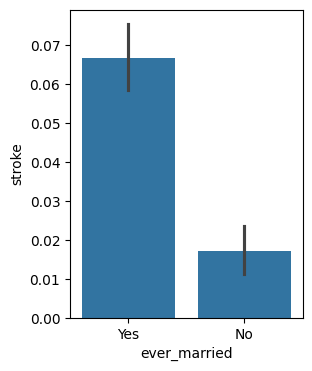

In [7]:
fig, ax = plt.subplots (figsize = (3,4))
sns.barplot(x="ever_married",y="stroke",data = df,ax=ax)
plt.show()

In [8]:
df['ever_married']=[0 if i!='Yes' else 1 for i in df['ever_married']]

In [9]:
print(df['ever_married'].unique())
print(df['work_type'].unique())
print(df['Residence_type'].unique())
print(df['smoking_status'].unique())
print(df['gender'].unique())

[1 0]
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Male' 'Female']


In [10]:
df = pd.get_dummies(df,columns=['work_type','Residence_type','smoking_status','gender'])
df.head()
df = df*1

In [11]:
df.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Govt_job                0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
gender_Female                     0
gender_Male                       0
dtype: int64

In [12]:
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male
0,67.0,0,1,1,228.69,36.6,1,0,1,0,0,0,1,0,1,0,0,0,1
1,80.0,0,1,1,105.92,32.5,1,0,1,0,0,1,0,0,0,1,0,0,1
2,49.0,0,0,1,171.23,34.4,1,0,1,0,0,0,1,0,0,0,1,1,0
3,79.0,1,0,1,174.12,24.0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,81.0,0,0,1,186.21,29.0,1,0,1,0,0,0,1,0,1,0,0,0,1


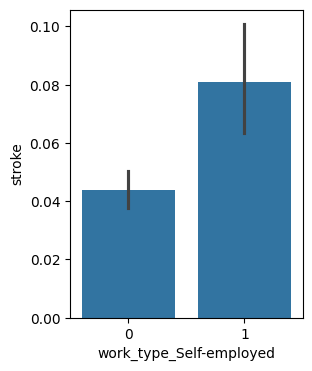

In [13]:
fig, ax = plt.subplots (figsize = (3,4))
sns.barplot(x="work_type_Self-employed",y="stroke",data = df,ax=ax)
plt.show()

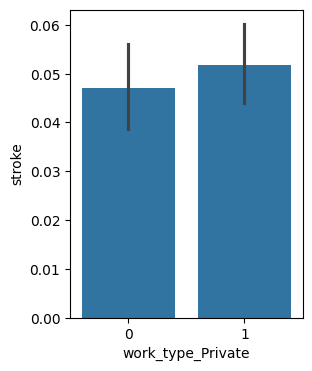

In [14]:
fig, ax = plt.subplots (figsize = (3,4))
sns.barplot(x="work_type_Private",y="stroke",data = df,ax=ax)
plt.show()

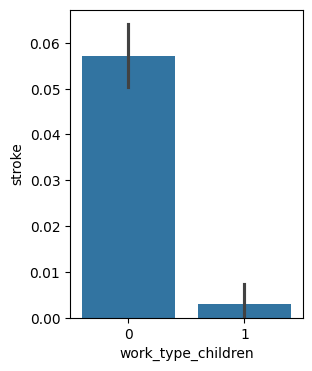

In [15]:
fig, ax = plt.subplots (figsize = (3,4))
sns.barplot(x="work_type_children",y="stroke",data = df,ax=ax)
plt.show()

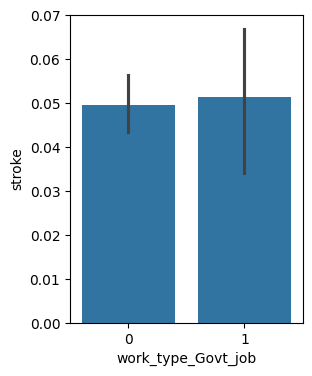

In [16]:
fig, ax = plt.subplots (figsize = (3,4))
sns.barplot(x="work_type_Govt_job",y="stroke",data = df,ax=ax)
plt.show()

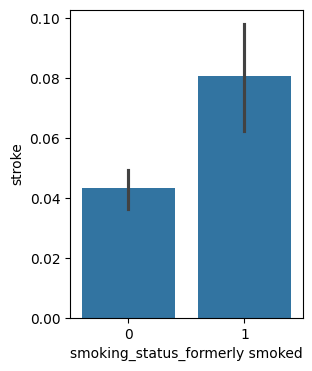

In [17]:
fig, ax = plt.subplots (figsize = (3,4))
sns.barplot(x="smoking_status_formerly smoked",y="stroke",data = df,ax=ax)
plt.show()

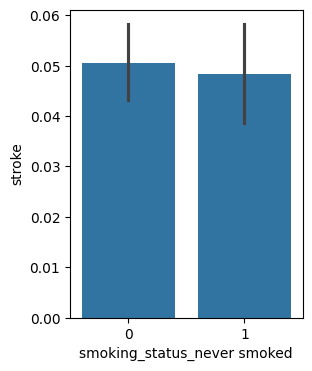

In [18]:
fig, ax = plt.subplots (figsize = (3,4))
sns.barplot(x="smoking_status_never smoked",y="stroke",data = df,ax=ax)
plt.show()

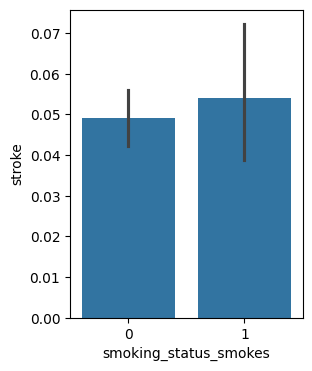

In [19]:
fig, ax = plt.subplots (figsize = (3,4))
sns.barplot(x="smoking_status_smokes",y="stroke",data = df,ax=ax)
plt.show()

In [20]:
df.corr()['stroke']


age                               0.246478
hypertension                      0.131965
heart_disease                     0.134610
ever_married                      0.108398
avg_glucose_level                 0.133227
bmi                               0.056926
stroke                            1.000000
work_type_Govt_job                0.002574
work_type_Private                 0.010459
work_type_Self-employed           0.062643
work_type_children               -0.085075
Residence_type_Rural             -0.016494
Residence_type_Urban              0.016494
smoking_status_Unknown           -0.055699
smoking_status_formerly smoked    0.065320
smoking_status_never smoked      -0.004806
smoking_status_smokes             0.008561
gender_Female                    -0.008870
gender_Male                       0.008870
Name: stroke, dtype: float64

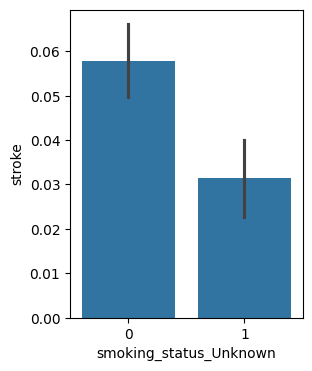

In [21]:
fig, ax = plt.subplots (figsize = (3,4))
sns.barplot(x="smoking_status_Unknown",y="stroke",data = df,ax=ax)
plt.show()

In [22]:
X = df.drop(['stroke'],axis=1)
y = df['stroke']

In [40]:
print(y.value_counts())

stroke
0    4733
1     248
Name: count, dtype: int64


In [23]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(sampling_strategy='minority')
X_over , Y_over = sampler.fit_resample(X,y)



In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_over,Y_over,test_size=0.3,random_state=5)

In [25]:
dt = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [26]:
confusion_matrix(y_pred,y_test)

array([[1021,  139],
       [ 393, 1287]], dtype=int64)

In [27]:
df['stroke'].value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

In [28]:
print(dt.tree_.threshold)

[ 47.5         37.5         76.15999985  76.125        0.5
  -2.          -2.          -2.          -2.           0.5
 101.45499802  39.5         -2.          -2.          45.70000076
  -2.          -2.          -2.          67.5         27.25
  21.25        20.15000057  -2.          -2.           0.5
  -2.          -2.         100.95500183  30.34999943  -2.
  -2.          27.34999943  -2.          -2.         126.84000015
  73.5        103.06000137  -2.          -2.          34.14999962
  -2.          -2.           0.5         25.75        -2.
  -2.         199.87000275  -2.          -2.        ]


In [29]:
accuracy_score(y_test,y_pred)

0.8126760563380282

In [30]:
rf = RandomForestClassifier(criterion="entropy",max_depth=15,random_state=0)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [31]:
confusion_matrix(rf_pred,y_test)

array([[1377,    0],
       [  37, 1426]], dtype=int64)

In [32]:
accuracy_score(y_test,rf_pred)

0.9869718309859155

In [33]:
lr = LogisticRegression(solver='lbfgs', max_iter=2000,random_state=2)
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)


In [34]:
confusion_matrix(lr_pred,y_test)

array([[1043,  233],
       [ 371, 1193]], dtype=int64)

In [35]:
predictions = lr.predict_proba(X_test)
predictions

array([[0.10419923, 0.89580077],
       [0.30362923, 0.69637077],
       [0.87808594, 0.12191406],
       ...,
       [0.58191073, 0.41808927],
       [0.21431885, 0.78568115],
       [0.9786865 , 0.0213135 ]])

In [36]:
accuracy_score(lr_pred,y_test)

0.7873239436619718

In [37]:
vc = VotingClassifier([('clf1',dt),('clf2',rf),('clf3',lr)],voting="soft")
#cross_val_score(vc,X_test,y_test).mean()
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('clf1',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     random_state=2)),
                             ('clf2',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=15,
                                                     random_state=0)),
                             ('clf3',
                              LogisticRegression(max_iter=2000,
                                                 random_state=2))],
                 voting='soft')

In [38]:
vc_pred = vc.predict(X_test)
accuracy_score(vc_pred,y_test)

0.9038732394366197

In [39]:
with open('model.pickle','wb') as fp:
    pickle.dump(vc,fp)

with open('lr.pickle','wb') as fp:
    pickle.dump(lr,fp)

with open('dt.pickle','wb') as fp:
    pickle.dump(dt,fp)

with open('rf.pickle','wb') as fp:
    pickle.dump(rf,fp)